# MLBD SEMESTER PROJECT

### Importing Libraries

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import time

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### Loading dataset


In [4]:
def load_data(file_pattern, delimiter=';'):
    """
    Funcion for loading datasets
    """
    files = glob.glob(file_pattern)
    dfs = [pd.read_csv(file, delimiter=delimiter) for file in files]
    return pd.concat(dfs, ignore_index=True)

In [5]:
# Load training data
efficientnet_train_data = load_data('EfficientNet/TRAIN_*.csv')
mobilenet_train_data = load_data('MobileNet/TRAIN_*.csv')
resnet_train_data = load_data('ResNet/TRAIN_*.csv')

In [6]:
# Load test data
efficientnet_test_data = pd.read_csv('efficientNet_test/TEST.csv', delimiter=';')
mobilenet_test_data = pd.read_csv('mobileNet_test/TEST.csv', delimiter=';')
resnet_test_data = pd.read_csv('resNet_test/TEST.csv', delimiter=';')

### Combining dataset

In [7]:
df_merged = efficientnet_train_data.merge(mobilenet_train_data, on=['images','cone_name','label'], suffixes=('_eff', '_mob'))
df_merged = df_merged.merge(resnet_train_data, on=['images','cone_name','label'])

In [8]:
# Saving the merged train data into csv file
#df_merged.to_csv('merged_train_data.csv')

In [9]:
df_merged_test = efficientnet_test_data.merge(mobilenet_test_data, on=['image'], suffixes=('_eff', '_mob'))
df_merged_test = df_merged_test.merge(resnet_test_data, on=['image'])

In [10]:
# Saving the merged test data into csv file
#df_merged_test.to_csv('merged_test_data.csv')

In [13]:
# Dropping columns from merged dataframe of train dataset
X = df_merged.drop(['Unnamed: 0_eff','Unnamed: 0_mob','Unnamed: 0','images','cone_name','label'], axis=1)
y = df_merged['label'] - 1     # Changing index of label to start from '0'

In [14]:
# Dropping columns from test dataset
X_test_img = df_merged_test.drop(['Unnamed: 0_eff','Unnamed: 0_mob','Unnamed: 0'], axis=1)
X_img = X_test_img.drop('image', axis=1)
y_img = X_test_img['image']

In [15]:
X_img.head() # contains 3073 columns
X_test_img.head() # contains 3072 columns

,f0_eff,f1_eff,f2_eff,f3_eff,f4_eff,f5_eff,f6_eff,f7_eff,f8_eff,f9_eff,...,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511
0,0.151561,0.131016,0.188074,0.097326,0.274534,0.221753,0.156587,0.079743,0.108194,0.168641,...,0.937713,0.874452,0.974516,1.105526,0.824213,0.847534,1.071275,0.944886,0.901812,0.883428
1,0.152722,0.185852,0.172080,0.298968,0.184606,0.145717,0.204202,0.115264,0.164645,0.201031,...,0.875002,0.928182,0.858758,1.086330,0.816912,0.809086,1.059228,1.033703,1.001865,0.824272
2,0.201151,0.188693,0.227748,0.239015,0.331858,0.223008,0.197266,0.248502,0.094364,0.176558,...,0.883526,0.979656,0.841254,0.985832,0.742647,0.816151,0.949110,0.962458,0.944196,0.901135
3,0.166100,0.230753,0.100677,0.173735,0.105974,0.172742,0.077620,0.076740,0.228600,0.255964,...,1.059928,0.806793,0.826533,0.990626,0.836815,0.871509,1.040827,0.939574,0.895419,0.933376
4,0.128817,0.133800,0.220247,0.193053,0.096692,0.205197,0.077397,0.108065,0.225586,0.194399,...,0.939965,0.892549,0.777361,1.024498,0.763530,0.887580,1.080938,0.968538,0.823913,0.971222


## Splitting dataset 


Splitting train dataset into **_80/20_ ratio**

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Train and Evaluate

Training different models such as xgboost, Random Forest, Gaussian Naive Bayes, Decision Tree and Support Vector Machine

In [17]:
# Function to train and evaluate a model
def train_and_evaluate(model, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    duration = end_time - start_time

    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'Time taken for {model_name} training: {duration:.2f} seconds')
    return accuracy, duration

In [18]:
# List of models to evaluate
models = [
    (XGBClassifier(n_estimators=350, max_depth=3, learning_rate=0.4,
                   use_label_encoder=False, eval_metric='mlogloss'), 'XGBoost'),
    (RandomForestClassifier(), 'Random Forest'),
    (GaussianNB(), 'Naive Bayes'),
    (DecisionTreeClassifier(), 'Decision Tree'),
    (SVC(), 'SVM')
]

# Dictionary to store results
results = {}

In [19]:
# Train and evaluate each model
for model, model_name in models:
    accuracy, duration = train_and_evaluate(model, model_name)
    results[model_name] = {'accuracy': accuracy, 'duration': duration}

XGBoost Accuracy: 0.93
Time taken for XGBoost training: 335.62 seconds
Random Forest Accuracy: 0.76
Time taken for Random Forest training: 75.39 seconds
Naive Bayes Accuracy: 0.81
Time taken for Naive Bayes training: 0.89 seconds
Decision Tree Accuracy: 0.69
Time taken for Decision Tree training: 65.37 seconds
SVM Accuracy: 0.91
Time taken for SVM training: 147.54 seconds


## Plotting the results

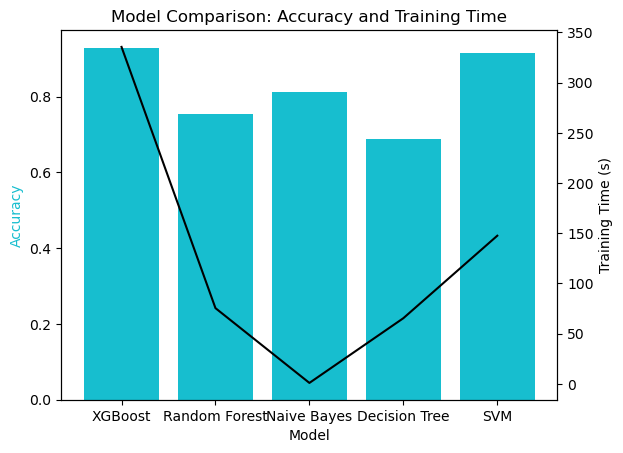

In [27]:
# Plotting the results
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]
durations = [results[model]['duration'] for model in model_names]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(model_names, accuracies, color='tab:cyan')
ax2.plot(model_names, durations, color='k')

ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color='tab:cyan')
ax2.set_ylabel('Training Time (s)', color='k')

plt.title('Model Comparison: Accuracy and Training Time')
plt.show()

## Hyperparameter selection

Tuning parameters to optimize the performance of **xgboost**

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 350],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
}

start_time = time.time()

xgb = XGBClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

end_time = time.time()
duration = end_time - start_time
print(f'Time taken: {duration}')

In [ ]:
# Train the model with the best parameters
start_time_xgb = time.time()
best_xgb = XGBClassifier(n_estimators=best_params['n_estimators'], random_state=42) #best_params['n_estimators']
best_xgb.fit(X_train, y_train)
end_time_xgb = time.time()
duration_xgb = end_time_xgb - start_time_xgb
print(f'Time taken for Best fit model training: {duration_xgb}')

# Make predictions
y_pred = best_xgb.predict(X_val)

# Evaluate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'XGBoost Accuracy with best n_estimators: {accuracy:.2f}')

## Cross-Validation


Implementing **10-Folds Cross-Validation**

In [28]:
def cross_validate_model(model, model_name):
    start_time = time.time()
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    end_time = time.time()
    duration = end_time - start_time
    mean_accuracy = np.mean(cv_scores)
    print(f'{model_name} 10-Folds Cross-Validation Accuracy: {mean_accuracy:.2f}')
    print(f'Time taken for {model_name} cross-validation: {duration:.2f} seconds')
    return mean_accuracy, duration

List of models to evaluate with 10-Folds Cross-Validation

In [29]:
models = [
    (XGBClassifier(n_estimators=350, max_depth=3, learning_rate=0.4,
                   use_label_encoder=False, eval_metric='mlogloss', random_state=42), 'XGBoost'),
    (SVC(random_state=42), 'SVM')
]

In [32]:
# Dictionary to store results
results = {}

# Perform 10-Folds Cross-Validation for each model
for model, model_name in models:
    accuracy, duration = cross_validate_model(model, model_name)
    results[model_name] = {'accuracy': accuracy, 'duration': duration}

XGBoost 10-Folds Cross-Validation Accuracy: 0.93
Time taken for XGBoost cross-validation: 3747.84 seconds
SVM 10-Folds Cross-Validation Accuracy: 0.90
Time taken for SVM cross-validation: 1384.74 seconds


In [33]:
# Compare results
print("\nComparison of model results:")
for model_name, metrics in results.items():
    print(f'{model_name} - 10-Folds CV Accuracy: {metrics["accuracy"]:.2f}, Duration: {metrics["duration"]:.2f} seconds')


Comparison of model results:
XGBoost - 10-Folds CV Accuracy: 0.93, Duration: 3747.84 seconds
SVM - 10-Folds CV Accuracy: 0.90, Duration: 1384.74 seconds


## Predict and Saving result


Predicting the **_test_** files and generating result based on the submission requirement

In [41]:
def predict_and_save(model, X_test, y_img, model_name):
    """
    Predict and save the test results to a CSV file.
    """
    output_file = f'submission_{model_name}.csv'
    pred = model.predict(X_test)
    pred = pred + 1  # Changing index back to '1' from '0'
    submission_df = pd.DataFrame({'ID': y_img, 'Class': pred})
    submission_df.to_csv(output_file, index=False)
    print(f"Predictions saved to {output_file}")

In [42]:
# Train the best SVM model on the entire training dataset
best_svm = SVC(random_state=42)
best_svm.fit(X, y)
predict_and_save(best_svm, X_img, y_img, 'svm')

Predictions saved to submission_svm.csv


In [43]:
# Train the XGBoost model on the entire training dataset
xgb = XGBClassifier(n_estimators=350, max_depth=3, learning_rate=0.4,
                    use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X, y)
predict_and_save(xgb, X_img, y_img, 'xgboost')

Predictions saved to submission_xgboost.csv
